In [5]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
base_dir = "/Users/Jackie/Dropbox/Work/machine_learning/hw/machine-learning-ex2/ex2"

In [7]:
file = os.path.join(base_dir, 'ex2data1.txt')
df = pd.read_csv(file, header=None, names = ['score1', 'score2', 'admitted'])
df.insert(0, 'ones', 1)

In [8]:
df.head()

,ones,score1,score2,admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [9]:
mask1 = df['admitted'] == 1
mask2 = df['admitted'] == 0

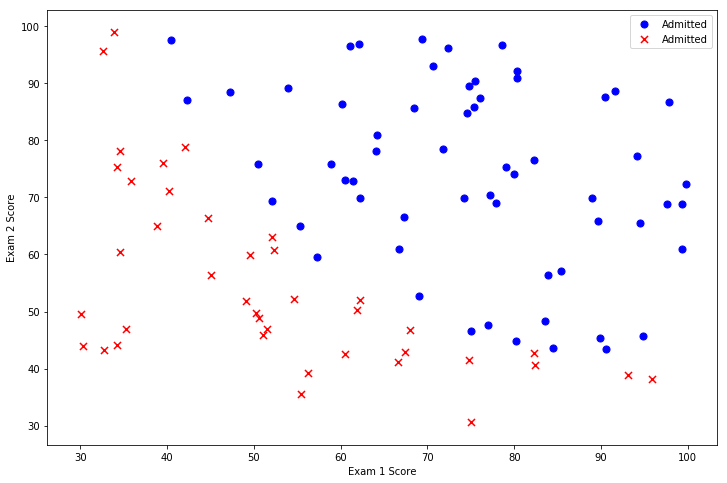

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df[mask1]['score1'], df[mask1]['score2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(df[mask2]['score1'], df[mask2]['score2'], s=50, c='r', marker='x', label='Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')


sigmoid function


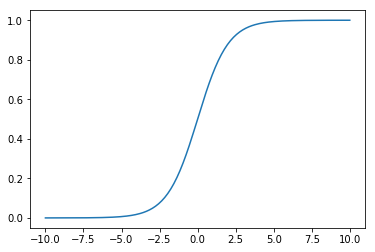

In [11]:
def sigmoid(z):    
    res = 1 / (1+ np.exp(-z))
    return res 
    
z = np.linspace(-10, 10, 200)

print('sigmoid function')
plt.plot(z, sigmoid(z))

In [12]:
def computeCost(theta, X, y):    
    m = len(X)
    z = X.dot(theta)
    h = sigmoid(z) 
    cost = -np.sum((y* np.log(h)  + (1-y) * np.log(1-h) )) / m
    
    return cost
    
    
def gradient(theta, X, y):
    """y is 1d array"""
    m = len(X)
    z = X.dot(theta)
    h = sigmoid(z) 
    error = h-y    
    grad = error.dot(X) / m 
    
    return grad 

In [13]:
ncol = df.shape[1]
X = df.iloc[:, 0:ncol-1].values
y = df.iloc[:, ncol-1].values
theta0 = np.array([0.0, 0.0, 0.0])
X_norm =  (X[:, 1:] - X[:, 1:].mean(axis=0))/X[:, 1:].std(axis=0)
X_norm = np.hstack((X[:, :1], X_norm))
y_norm = (y - y.mean())/y.std()
cost =  computeCost( theta0, X,y)
grad = gradient( theta0, X,y)
print("cost at initial theta: ",  cost)
print("gradient at initial theta: ",  grad)

cost at initial theta:  0.6931471805599453
gradient at initial theta:  [ -0.1        -12.00921659 -11.26284221]


In [14]:
def gradientDescent(X, y, theta0, step, n_iter):
    m = len(X)
    z = X.dot(theta0)    
    
    theta = theta0.copy()
    cost = np.zeros(n_iter)
    for i in range(n_iter):                        
        grad = gradient(theta, X, y)
        theta -= step * grad 
        cost[i]= computeCost(theta, X, y)        
        
    return theta, cost 
        

In [15]:
step = 0.001
n_iter = 100000
theta, cost = gradientDescent(X, y, theta0, step, n_iter )
print("runing gradient descent with step %s and iter %s" % (step, n_iter))
print("optimal theta: ", theta)
print("cost over iterations: ", cost)

runing gradient descent with step 0.001 and iter 100000
optimal theta:  [-4.81180027  0.04528064  0.03819149]
cost over iterations:  [0.69829069 0.65971176 0.66162727 ... 0.38739176 0.38739064 0.38738952]


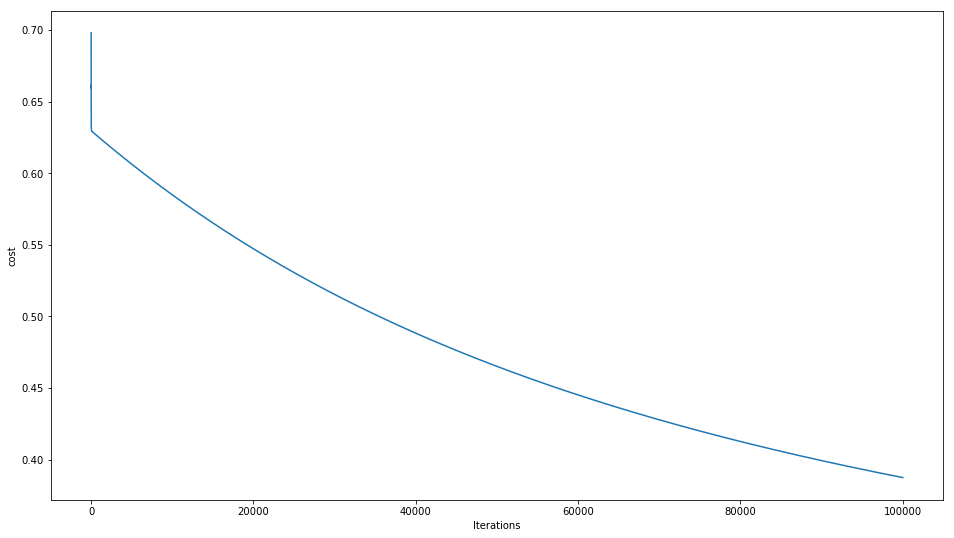

In [16]:
plt.figure(figsize=(16, 9))
plt.plot(np.arange(n_iter), cost)
plt.xlabel('Iterations')
plt.ylabel('cost')

# find gradient using optimizer

In [17]:
import scipy.optimize as opt
res = opt.minimize(fun=computeCost, method='TNC', jac=gradient, x0=theta0, args=(X, y))
print(res.x, res.nit, res.status)

[-25.16131864   0.20623159   0.20147149] 17 0


In [18]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probability]

f = predict(res.x, X) 
accuracy = np.sum(f-y == 0) /  ( np.sum(f-y == 0) +  np.sum(f-y != 0) )
print("accuracy: ", accuracy)

accuracy:  0.89


# logistic regression with regularization 

In [19]:
file2 = os.path.join(base_dir, 'ex2data2.txt')
df2 = pd.read_csv(file2, header=None, names = ['t1', 't2', 'accepted'])
df2.insert(0, 'ones', 1)
df2.head()

,ones,t1,t2,accepted
0,1,0.051267,0.69956,1
1,1,-0.092742,0.68494,1
2,1,-0.213710,0.69225,1
3,1,-0.375000,0.50219,1
4,1,-0.513250,0.46564,1


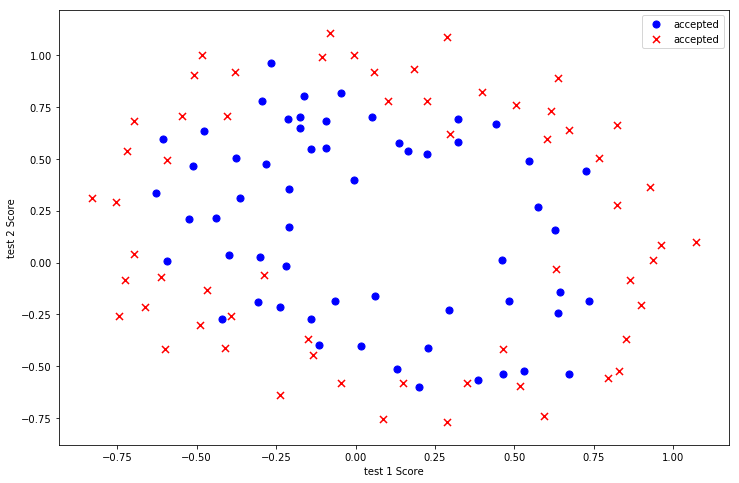

In [20]:
mask1 = df2['accepted'] == 1
mask2 = df2['accepted'] == 0
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df2[mask1]['t1'], df2[mask1]['t2'], s=50, c='b', marker='o', label='accepted')
ax.scatter(df2[mask2]['t1'], df2[mask2]['t2'], s=50, c='r', marker='x', label='accepted')
ax.legend()
ax.set_xlabel('test 1 Score')
ax.set_ylabel('test 2 Score')


In [21]:
def mapfeature(x1, x2, degree):
    ans = []
    ans.append(np.ones( len(x1)))
    for i in range(0, degree):
        for j in range(0, i+1):
            x = np.power(x1, i-j) * np.power(x2, j)    
            ans.append(x)       
    ans = np.stack(ans).transpose()        
    return ans 
                   

In [22]:
#mapfeature
degree = 7
X2 = mapfeature(df2['t1'].values, df2['t2'].values, degree)
y2 = df2['accepted'].values


In [23]:
def computeCostReg(theta, X, y, penalty):    
    m = len(X)
    z = X.dot(theta)
    h = sigmoid(z) 
    cost = -np.sum((y* np.log(h)  + (1-y) * np.log(1-h) )) / m 
    cost += penalty * np.sum(np.power(theta[1:], 2)) / (2*m)            
    return cost
    

In [24]:
def gradientReg(theta, X, y, penalty):
    m = len(X)
    z = X.dot(theta)
    h = sigmoid(z)         
           
    grad = (h-y).dot(X)/m     
    grad = grad + penalty*np.concatenate([[0], theta[1:]]) / m 
        
    return grad
        

In [25]:
theta2 = np.zeros(X2.shape[1])
penalty = 1
print(computeCostReg(theta2, X2,y2, penalty))
print(gradientReg(theta2, X2, y2,  penalty))

0.6931471805599454
[8.47457627e-03 8.47457627e-03 1.87880932e-02 7.77711864e-05
 5.03446395e-02 1.15013308e-02 3.76648474e-02 1.83559872e-02
 7.32393391e-03 8.19244468e-03 2.34764889e-02 3.93486234e-02
 2.23923907e-03 1.28600503e-02 3.09593720e-03 3.93028171e-02
 1.99707467e-02 4.32983232e-03 3.38643902e-03 5.83822078e-03
 4.47629067e-03 3.10079849e-02 3.10312442e-02 1.09740238e-03
 6.31570797e-03 4.08503006e-04 7.26504316e-03 1.37646175e-03
 3.87936363e-02]


In [26]:
penalty0 = 0
result0 = opt.fmin_tnc(func=computeCostReg, x0=theta2, fprime=gradientReg, args=(X2, y2, penalty0))
result0 = opt.minimize(fun=computeCostReg, method='tnc', x0=theta2, jac = gradientReg, args=(X2, y2, penalty0) )
theta_min0 = result0.x
print("cost with regularization lambda %s: %s" %(penalty0, computeCost(theta_min0, X2,y2)) )

penalty1 = 1
result1 = opt.minimize(fun=computeCostReg, method='tnc', x0=theta2, jac = gradientReg, args=(X2, y2, penalty1) )
theta_min1 = result1.x
print("cost with regularization lambda %s: %s" %(penalty1, computeCost(theta_min1, X2,y2)) )

penalty2 = 100
result2 = opt.minimize(fun=computeCostReg, method='tnc', x0=theta2, jac = gradientReg, args=(X2, y2, penalty2) )
theta_min2 = result2.x
print("cost with regularization lambda %s: %s" %(penalty2, computeCost(theta_min2, X2,y2)) )

print("sum of theta0^2:", np.sum(np.power(theta_min0,2))  )
print("sum of theta1^2:", np.sum(np.power(theta_min1,2))  )
print("sum of theta2^2:", np.sum(np.power(theta_min2,2))  )

cost with regularization lambda 0: 0.2560986285814115
cost with regularization lambda 1: 0.46245886820574855
cost with regularization lambda 100: 0.6803807995246228
sum of theta0^2: 3875028.1568463375
sum of theta1^2: 17.324351836524233
sum of theta2^2: 0.014881834101991143


In [27]:
 theta_min2

array([ 2.18785978e-02, -1.84686266e-07, -1.74817072e-02,  5.71074785e-03,
       -5.51689874e-02, -1.31487494e-02, -3.85986440e-02, -1.84635628e-02,
       -7.73219179e-03, -8.92428628e-03, -2.28045622e-02, -4.34384810e-02,
       -2.35622677e-03, -1.41561279e-02, -3.49506739e-03, -4.14359191e-02,
       -2.10059402e-02, -4.71916640e-03, -3.59130921e-03, -6.32225932e-03,
       -5.02439969e-03, -3.19767900e-02, -3.41633591e-02, -1.07628508e-03,
       -7.02615355e-03, -3.85060619e-04, -7.98230173e-03, -1.54778225e-03,
       -4.10868042e-02])

In [30]:
# plot decision boundary with penalty 1
def plot_decision_bound(df2, ngrid, degree, theta_min, penalty ):
    mask1 = df2['accepted'] == 1
    mask2 = df2['accepted'] == 0
    fig, ax = plt.subplots(figsize=(12,8))
    ax.scatter(df2[mask1]['t1'], df2[mask1]['t2'], s=50, c='b', marker='o', label='accepted')
    ax.scatter(df2[mask2]['t1'], df2[mask2]['t2'], s=50, c='r', marker='x', label='accepted')
    ngrid = 50
    x1_grid = np.linspace(-1.0, 1.5, ngrid)
    x2_grid = np.linspace(-1.0, 1.5, ngrid)

    X1, X2 = np.meshgrid(x1_grid, x2_grid)
    f= mapfeature(X1.flatten(), X2.flatten(), degree)

    z = sigmoid(f.dot(theta_min))    
    z = z.reshape((ngrid, ngrid))    
    z = z > 0.5
    #CS = ax.contour(X1, X2, z, levels=[0.3, 0.5])
    CS = ax.contour(X1, X2, z)
    ax.clabel(CS, inline=2, fontsize=10)

    ax.legend()
    ax.set_xlabel('test 1 Score')
    ax.set_ylabel('test 2 Score')
    ax.set_title("lambda=%s"% penalty )
    return z 


/Users/Jackie/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


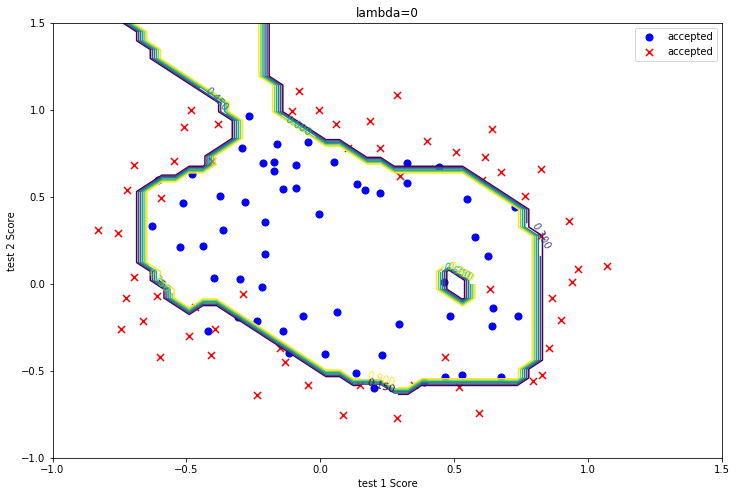

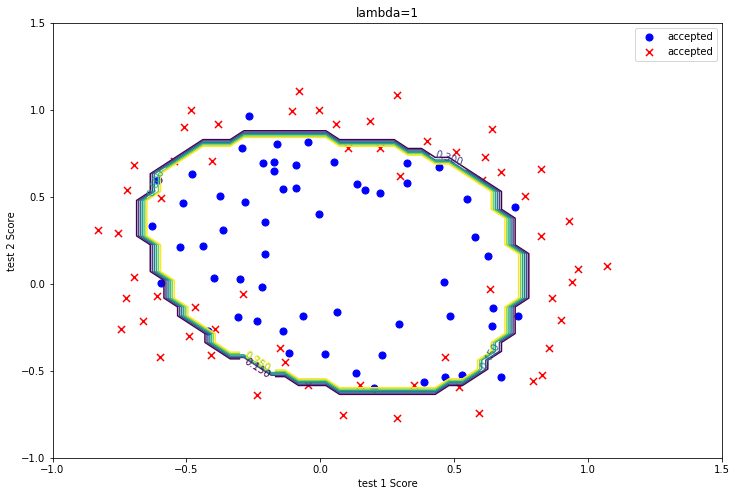

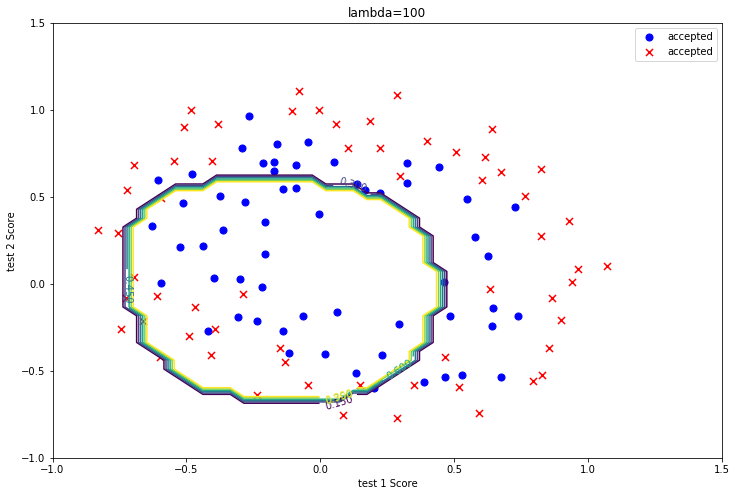

In [31]:
z0 = plot_decision_bound(df2, 50, 7, theta_min0, penalty0)
z1 = plot_decision_bound(df2, 50, 7, theta_min1, penalty1)
z2 = plot_decision_bound(df2, 50, 7, theta_min2, penalty2)

(array([   7.,   15.,   24.,   40.,  119.,  141.,  157.,  216.,  299.,
        1482.]),
 array([0.07064742, 0.11417412, 0.15770081, 0.2012275 , 0.24475419,
        0.28828088, 0.33180757, 0.37533426, 0.41886096, 0.46238765,
        0.50591434]),
 <a list of 10 Patch objects>)

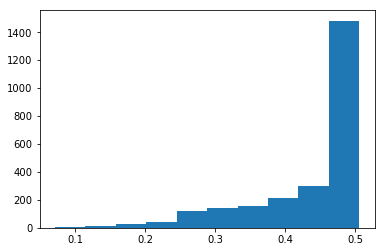

In [38]:
# plt.hist(z0.ravel()) 
plt.hist(z2.ravel()) 